## Analysis for the checkpoint project I

#### Why does churn matter
- When churn is higher than growth, it's bad for business
- When a company's churn is higher than the competition (or the average of the industry), it means it's doing something wrong and customers are leaving
- When a company's churn is higher than the competition (or the average of the industry), it means it's loosing business to its competitors
#### Variable is CHURN
#### Goals: what are the drivers of churn?
- Service quality
- Price
- Poor customer service
- Features and content availibility
#### My MVP:
- One reason customers are churning
- One way to solve
- A clear process following the steps below and comprising photos and documentation:
    - Prepare
     Story
     Audience
     Setting
     Brainstorm
     Types of Viz
    - Talk and Listen
    - Sketch
    - Prototype
- My sources

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
telco = pd.read_csv("Arsene BOUNDAONE - jemison_spreadsheet_exercises - Copy of Table1_CustDetails.csv")

In [4]:
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,monthly_charges2,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,True,3,65.6,TRUE,One Line,DSL,1 Year,9.0,Internet+Phone
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,True,0,59.9,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,9.0,Internet+Phone
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,True,0,73.9,TRUE,One Line,DSL,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,True,1,98,TRUE,One Line,DSL,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,True,1,83.9,TRUE,One Line,DSL,Month-to-Month,3.0,Internet+Phone


In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7049 non-null   object 
 1   gender                  7049 non-null   object 
 2   is_senior_citizen       7049 non-null   int64  
 3   partner                 7049 non-null   object 
 4   dependents              7049 non-null   object 
 5   phone_service           7049 non-null   int64  
 6   internet_service        7049 non-null   int64  
 7   contract_type           7049 non-null   int64  
 8   payment_type            7049 non-null   object 
 9   monthly_charges         7049 non-null   float64
 10  total_charges           7038 non-null   float64
 11  churn                   7049 non-null   object 
 12  tenure                  7049 non-null   float64
 13  is_female               7049 non-null   bool   
 14  has_churned             7049 non-null   

In [7]:
telco.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

<AxesSubplot:>

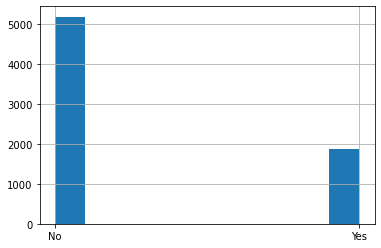

In [14]:
telco.churn.hist()

In [18]:
round(telco[telco.churn == "Yes"].shape[0] / telco.shape[0]*100, 2)

26.53

#### There is a 26.53% churn of Telco clients
#### The telecommunication industry according to Statista and smartlook.com has an average churn rate of 21%.
#### This means that TelcoCo has an above average churn rate.
#### Questions we can ask ourselves are:
- Is TelcoCo recovering customer acquisition costs before they leave?
- Is the company's growth rate higher than it's churn rate?
#### We cannot answer the previous questions so we will move onto the next ones.

#### According to Investopedia, a churn rate is the most valuable when we know what type of customer has churned. We can ask ourselves:
- Wat is the cost of those who are leaving?

In [27]:
telco[telco.churn == "Yes"].shape[0]

1870

In [33]:
telco[telco.churn == "Yes"], telco.total_charges.sum()

(     customer_id  gender  is_senior_citizen partner dependents  phone_service  \
 2     0004-TLHLJ    Male                  0      No         No              1   
 3     0011-IGKFF    Male                  1     Yes         No              1   
 4     0013-EXCHZ  Female                  1     Yes         No              1   
 18    0022-TCJCI    Male                  1      No         No              1   
 19    0023-HGHWL    Male                  1      No         No              0   
 ...          ...     ...                ...     ...        ...            ...   
 7023  9965-YOKZB    Male                  1      No         No              2   
 7031  0032-PGELS  Female                  0     Yes        Yes              0   
 7042  9985-MWVIX  Female                  0      No         No              1   
 7043  9986-BONCE  Female                  0      No         No              1   
 7045  9992-RRAMN    Male                  0     Yes         No              2   
 
       interne

- Is there a factor that determine significantly which customer is leaving and who is staying?
#### Let's find out by computing the correlation between meaningful variables we have.